In [1]:
#pivot
#stacking and unstacking
#rank in numpy
#data visualization using matplotlib, pandas and seaborn library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
bank = pd.read_csv('https://bit.ly/2GZGssO',sep =';')
odi = pd.read_csv('https://bit.ly/2EN4qrx')

In [8]:
summary = bank.groupby(['job','marital']).agg({'balance':'mean'})
summary

balance
job           marital              
admin.        divorced   878.333333
              married   1281.409580
              single    1020.739005
blue-collar   divorced   820.806667
              married   1113.165901
              single    1056.105263
entrepreneur  divorced  1155.983240
              married   1643.387850
              single    1248.235294
housemaid     divorced  1573.222826
              married   1248.173246
              single    2074.743056
management    divorced  1618.073807
              married   1828.159444
              single    1700.219545
retired       divorced  1507.835294
              married   2140.098787
              single    1360.388889
self-employed divorced  2426.350000
              married   1644.948640
              single    1410.365471
services      divorced   834.304189
              married   1088.847528
              single     887.324708
student       divorced  1101.000000
              married   1164.796296
              single    1403.753986
technician    divorced   924.048649
              married   1307.399556
              single    1283.938168
unemployed    divorced  1409.643275
              married   1568.632011
              single    1484.079800
unknown       divorced  1706.294118
              married   1788.128079
              single    1741.794118

In [9]:
summary.index

MultiIndex(levels=[['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], ['divorced', 'married', 'single']],
           codes=[[0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11], [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=['job', 'marital'])

In [10]:
bank[(bank['job'] == 'admin.') & (bank['marital'] == 'divorced')]['balance'].mean()

878.3333333333334

In [11]:
summary.loc[('admin.','divorced'),'balance']   #multi index

878.3333333333334

In [12]:
#index can be changed such that based on marital status, job types are shown(both of them still representing indexes)
#this can be done by using pivot table or by stacking/unstacking

In [14]:
#convert from long format(easy to store in machine) to wide format(easy to read)

In [18]:
summary.unstack(level=0) #pulling out values from level 0(job types)

balance                                                      \
job            admin.  blue-collar entrepreneur    housemaid   management   
marital                                                                     
divorced   878.333333   820.806667  1155.983240  1573.222826  1618.073807   
married   1281.409580  1113.165901  1643.387850  1248.173246  1828.159444   
single    1020.739005  1056.105263  1248.235294  2074.743056  1700.219545   

                                                                            \
job           retired self-employed     services      student   technician   
marital                                                                      
divorced  1507.835294   2426.350000   834.304189  1101.000000   924.048649   
married   2140.098787   1644.948640  1088.847528  1164.796296  1307.399556   
single    1360.388889   1410.365471   887.324708  1403.753986  1283.938168   

                                    
job        unemployed      unknown  
marital                             
divorced  1409.643275  1706.294118  
married   1568.632011  1788.128079  
single    1484.079800  1741.794118

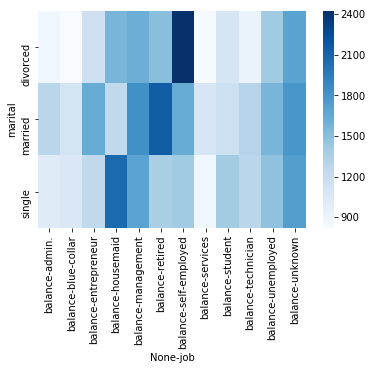

In [24]:
summary_wide = summary.unstack(level=0)
sns.heatmap(summary_wide,cmap='Blues')

In [25]:
#filter records for Sachin R tendulkar, Virender Sehwag, Rahul Dravid
#create a heatmap where rows will have playernames, columns will have 'Versus' and values=average runs

In [26]:
odi.head()

,Country,Player,Runs,ScoreRate,MatchDate,Ground,Versus,URL
0,Afghanistan,Mohammad Shahzad,118.0,97.52,2-16-2010,Sharjah CA Stadium,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3087
1,Afghanistan,Mohammad Shahzad,110.0,99.09,9-1-2009,VRA Ground,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3008
2,Afghanistan,Mohammad Shahzad,100.0,138.88,8-16-2010,Cambusdoon New Ground,Scotland,../Matches/MatchScorecard_ODI.asp?MatchCode=3164
3,Afghanistan,Mohammad Shahzad,82.0,75.92,7-10-2010,Hazelaarweg,Netherlands,../Matches/MatchScorecard_ODI.asp?MatchCode=3153
4,Afghanistan,Mohammad Shahzad,57.0,100.00,7-1-2010,Sportpark Westvliet,Canada,../Matches/MatchScorecard_ODI.asp?MatchCode=3135


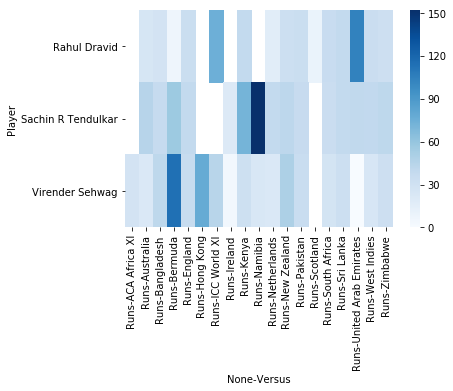

In [171]:
players = ['Sachin R Tendulkar','Rahul Dravid','Virender Sehwag']
odi1 = odi[(odi['Player'].isin(players))]
summary1 = odi1.groupby(['Player','Versus']).agg({'Runs':'mean'})
summary1
wide = summary1.unstack(level=1)
sns.heatmap(wide,cmap='Blues')

In [55]:
##Pivot table
summary_pivot = pd.pivot_table(odi1,index='Player',columns='Versus',values='Runs',aggfunc='mean')   #index=Player, columns=Versus
summary_pivot

Versus,ACA Africa XI,Australia,Bangladesh,Bermuda,England,Hong Kong,ICC World XI,Ireland,Kenya,Namibia,Netherlands,New Zealand,Pakistan,Scotland,South Africa,Sri Lanka,United Arab Emirates,West Indies,Zimbabwe
Player,,,,,,,,,,,,,,,,,,,
Rahul Dravid,NaN,24.974359,28.142857,7.0,34.896552,NaN,75.0,NaN,39.777778,NaN,17.0,33.290323,34.527273,10.0,36.361111,39.571429,104.0,35.473684,32.777778
Sachin R Tendulkar,NaN,45.641791,38.200000,57.0,39.324324,NaN,NaN,21.0,71.888889,152.0,39.5,42.682927,37.484848,NaN,35.105263,39.773333,40.5,40.333333,41.727273
Virender Sehwag,28.166667,22.370370,41.916667,114.0,37.333333,78.0,45.0,5.0,32.600000,24.0,22.5,50.304348,35.724138,NaN,27.611111,33.577778,0.0,24.826087,32.857143


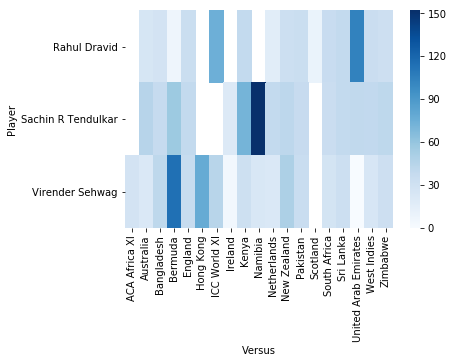

In [61]:
sns.heatmap(summary_pivot,cmap='Blues')

In [62]:
#above method is called data wrangling

In [71]:
# to reverse result: wide to long
summary_pivot.stack()

Player              Versus              
Rahul Dravid        Australia                24.974359
                    Bangladesh               28.142857
                    Bermuda                   7.000000
                    England                  34.896552
                    ICC World XI             75.000000
                    Kenya                    39.777778
                    Netherlands              17.000000
                    New Zealand              33.290323
                    Pakistan                 34.527273
                    Scotland                 10.000000
                    South Africa             36.361111
                    Sri Lanka                39.571429
                    United Arab Emirates    104.000000
                    West Indies              35.473684
                    Zimbabwe                 32.777778
Sachin R Tendulkar  Australia                45.641791
                    Bangladesh               38.200000
                    Berm

In [69]:
summary_pivot.stack().reset_index().rename(columns={0:'Avg Runs'}).head()

,Player,Versus,Avg Runs
0,Rahul Dravid,Australia,24.974359
1,Rahul Dravid,Bangladesh,28.142857
2,Rahul Dravid,Bermuda,7.000000
3,Rahul Dravid,England,34.896552
4,Rahul Dravid,ICC World XI,75.000000


# Data visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure()
plt.show()

<Figure size 432x288 with 0 Axes>

In [4]:
top_players = odi['Player'].value_counts().head(10)
top_players

Sachin R Tendulkar        442
Sanath T Jayasuriya       433
Ricky T Ponting           360
Inzamam-ul-Haq            351
D P Mahela Jayawardene    330
Rahul Dravid              318
Mohammad Azharuddin       308
Jacques H Kallis          303
Shahid Afridi             303
Sourav C Ganguly          300
Name: Player, dtype: int64

In [76]:
#x axis player names
# yaxis player numbers
top_players.index

Index(['Sachin R Tendulkar', 'Sanath T Jayasuriya', 'Ricky T Ponting',
       'Inzamam-ul-Haq', 'D P Mahela Jayawardene', 'Rahul Dravid',
       'Mohammad Azharuddin', 'Jacques H Kallis', 'Shahid Afridi',
       'Sourav C Ganguly',
       ...
       'Zameer Zahir', 'Anthony M Stuart', 'Richard J Webb', 'Njabulo Ncube',
       'Johann Louw', 'Aruna A W Gunawardene', 'Phenyo V Mpitsang',
       'Rohan S A Jayasekera', 'William M Lawry', 'Norman Gifford'],
      dtype='object', length=1936)

Text(0.5,1,'top ten players by total no. of matches')

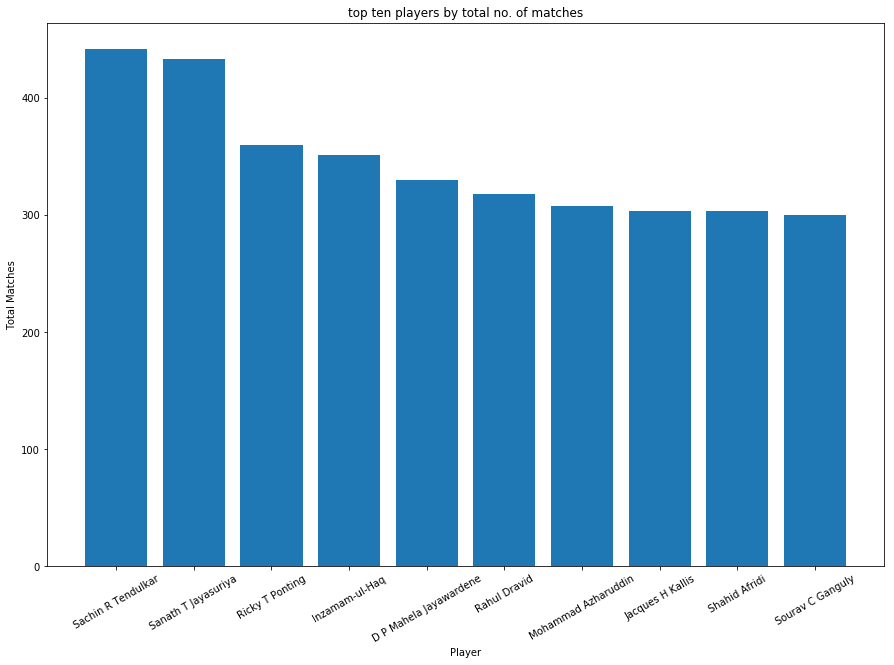

In [20]:
xvalues = top_players.index
yvalues = top_players.values
plt.figure(figsize=(15,10))
plt.bar(xvalues,yvalues)
plt.xticks(rotation=30)
plt.xlabel('Player')
plt.ylabel('Total Matches')
plt.title('top ten players by total no. of matches')

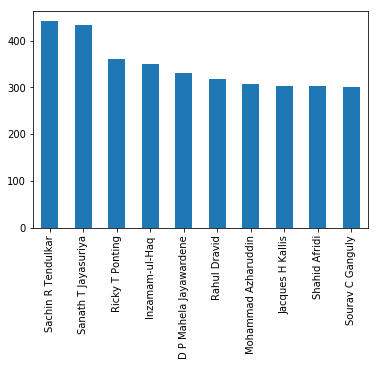

In [24]:
top_players.plot.bar()

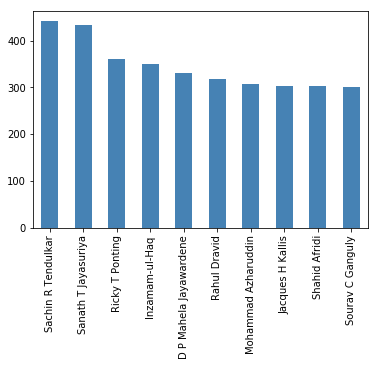

In [30]:
odi['Player'].value_counts().head(10).plot.bar(color='steelblue')

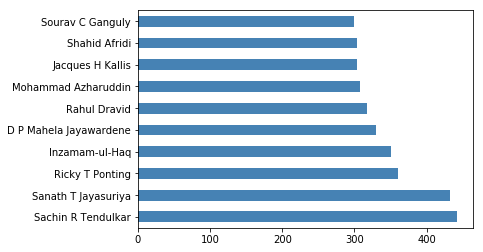

In [31]:
odi['Player'].value_counts().head(10).plot.barh(color='steelblue') #horizontal bar chart

# line chart


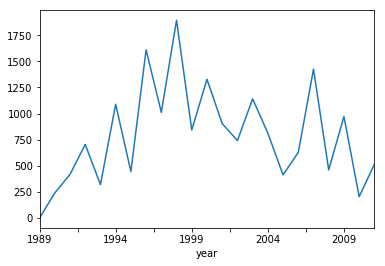

In [37]:
odi['year'] = odi['MatchDate'].str[-4:]
odi['year']
sachin_rows = odi[odi['Player'].str.contains('Sachin')]
years_runs = sachin_rows.groupby(['year'])['Runs'].sum()
#years_runs = sachin_rows.groupby(['year']).agg({'Runs':'sum'})['Runs']
years_runs.plot.line()

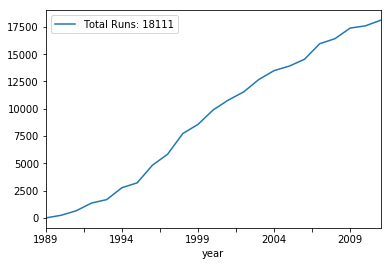

In [39]:
plt.figure()
years_runs.cumsum().plot.line()   #sum keeps adding to the previously obtained sum(for each year)
plt.legend(['Total Runs: %d' %years_runs.sum()])

In [40]:
#line chart syntax?

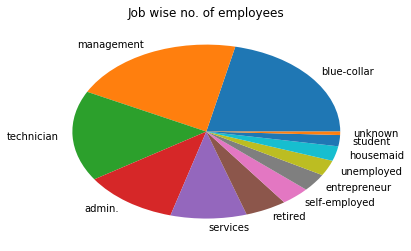

In [178]:
#pie plot:
bank_job_types = bank['job'].value_counts()
plt.figure()
bank_job_types.plot.pie()
plt.ylabel('')
plt.title('Job wise no. of employees')
plt.get_cmap()

In [49]:
hr = pd.read_csv('https://bit.ly/2zwLZ5I')
hr.shape

(1470, 35)

In [50]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [52]:
hr['MonthlyIncome'].describe()   #25 percentile or 1st quartile

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [55]:
hr['MonthlyIncome'].sort_values().median()

4919.0

In [56]:
hr['MonthlyIncome'].sort_values().iloc[735]  #approx middle value(wrong, but just for chekcing whether going in the correct direction)

4930

In [58]:
hr['MonthlyIncome'].sort_values().iloc[360]   #near the 1st quartile(25%), so just checking if going in correct direction

2886

# box plot

IQR(inter quartile range) = Q3-Q1


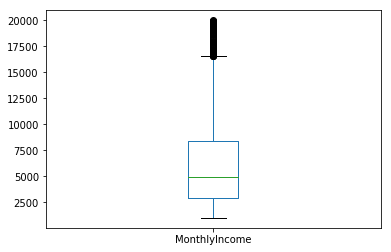

In [59]:
hr['MonthlyIncome'].plot.box()

Upper whisker
3rd quartile
2nd quartile
1st quartile
lower whisker

lower whsiker = Q1-1.5*IQR
upper whisker = Q3+1.5*IQR

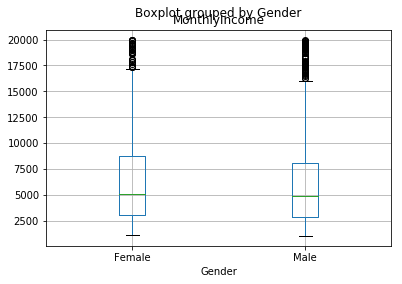

In [61]:
hr.boxplot('MonthlyIncome',by='Gender')    #for multiple indexes

<Figure size 432x288 with 0 Axes>

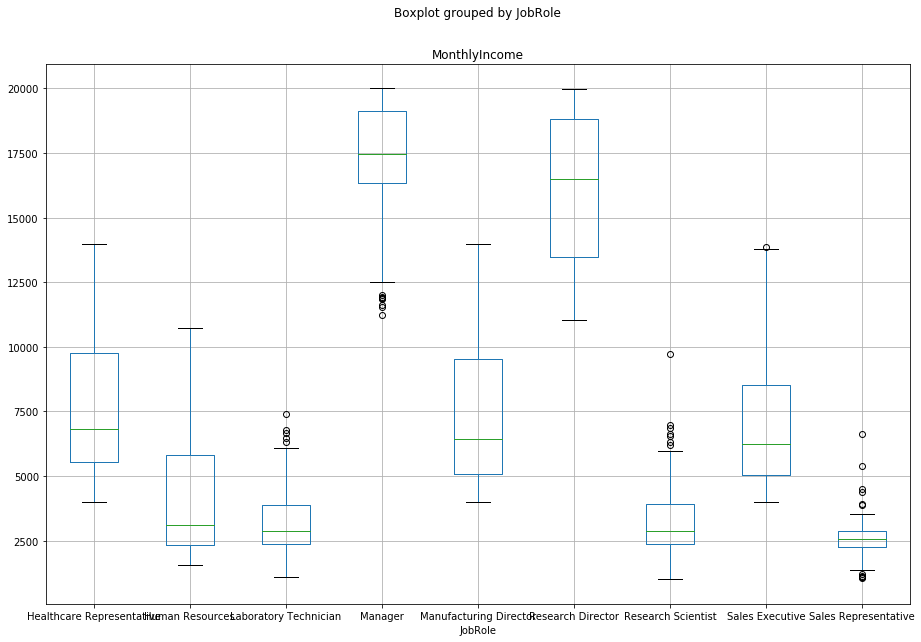

In [70]:
plt.figure()
hr.boxplot('MonthlyIncome',by='JobRole',figsize=(15,10))  

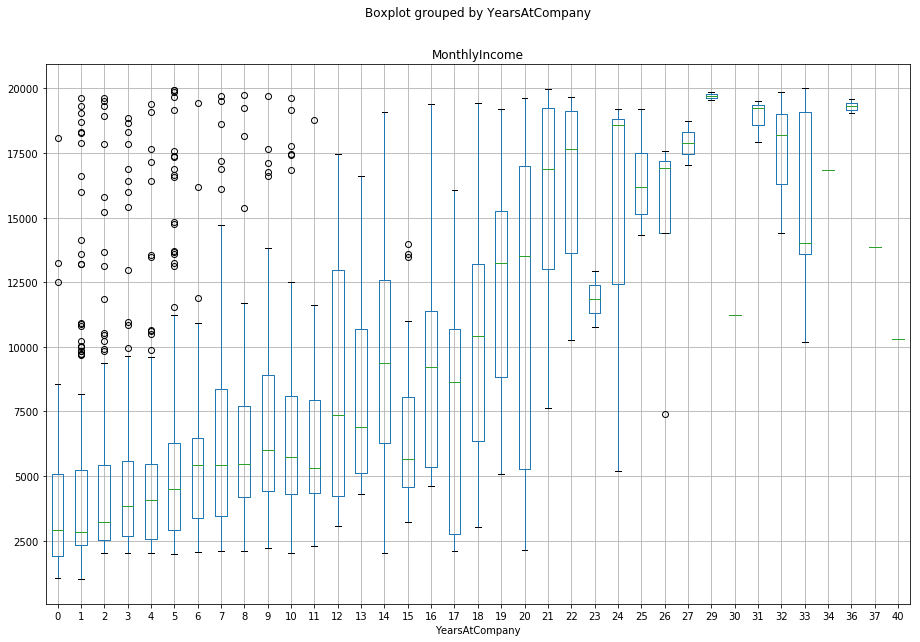

In [75]:
hr.boxplot('MonthlyIncome',by='YearsAtCompany',figsize=(15,10))  

In [81]:
sales = hr[hr['JobRole'] == 'Sales Representative']
quantiles = sales['MonthlyIncome'].quantile([0.25,0.75])
iqr = quantiles.loc[0.75] - quantiles.loc[0.25]
lowwhisk = quantiles.loc[0.25] - 1.5*iqr
upwhisk = quantiles.loc[0.75] + 1.5*iqr
lowwhisk, upwhisk

(1307.25, 3821.25)

In [82]:
sales[sales['MonthlyIncome']<lowwhisk]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
301,18,0,Travel_Rarely,812,Sales,10,3,Medical,1,411,...,1,80,0,0,2,3,0,0,0,0
764,28,0,Travel_Rarely,1144,Sales,10,1,Medical,1,1056,...,2,80,0,1,5,3,1,0,0,0
911,25,1,Travel_Frequently,599,Sales,24,1,Life Sciences,1,1273,...,4,80,0,1,4,3,1,0,1,0
1338,30,1,Travel_Rarely,945,Sales,9,3,Medical,1,1876,...,3,80,0,1,3,2,1,0,0,0
1365,29,1,Travel_Frequently,746,Sales,24,3,Technical Degree,1,1928,...,4,80,0,1,3,3,1,0,0,0


In [83]:
sales[sales['MonthlyIncome']>upwhisk]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
238,32,0,Travel_Rarely,1401,Sales,4,2,Life Sciences,1,330,...,1,80,1,6,5,3,4,3,1,2
539,50,0,Travel_Rarely,316,Sales,8,4,Marketing,1,738,...,4,80,1,4,2,3,2,2,2,2
564,45,0,Travel_Rarely,954,Sales,2,2,Technical Degree,1,783,...,1,80,0,9,3,3,8,7,3,1
1021,25,1,Travel_Rarely,383,Sales,9,2,Life Sciences,1,1439,...,1,80,0,6,2,3,3,2,2,2
1220,36,0,Travel_Rarely,530,Sales,2,4,Life Sciences,1,1710,...,3,80,0,17,2,2,13,7,6,7
1308,38,0,Travel_Rarely,723,Sales,2,4,Marketing,1,1835,...,1,80,2,20,4,2,4,2,0,3


In [84]:
#left and right skew to Normal distribution

In [85]:
#negative and positive kurtosis to normal dusribution

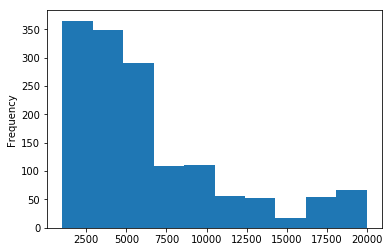

In [88]:
hr['MonthlyIncome'].plot.hist()   #right skewed is generated

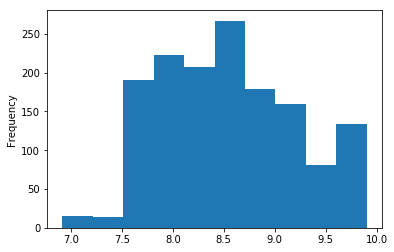

In [89]:
np.log(hr['MonthlyIncome']).plot.hist()    #slightly close to normal distribution, by log transformation

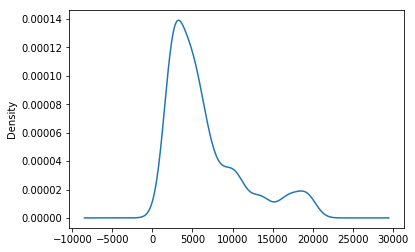

In [90]:
hr['MonthlyIncome'].plot(kind='kde')  #kernel density estimation(similar to probability distribution function)

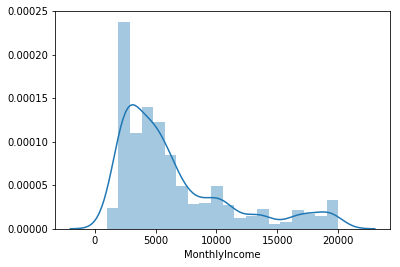

In [92]:
sns.distplot(hr['MonthlyIncome'],kde=True)

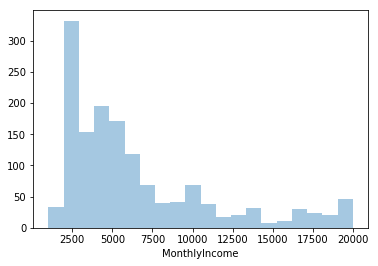

In [93]:
sns.distplot(hr['MonthlyIncome'],kde=False)

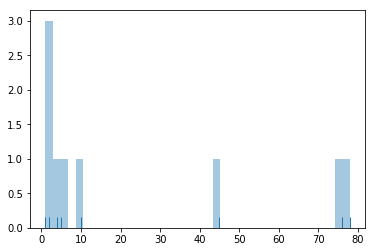

In [98]:
x = pd.Series([1,2,2,4,10,76,45,5,78])
sns.distplot(x,kde=False,rug=True,bins=40)

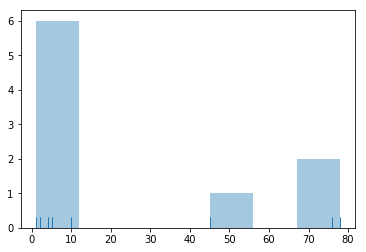

In [102]:
x = pd.Series([1,2,2,4,10,76,45,5,78])
sns.distplot(x,kde=False,rug=True,bins=7)  #rug shows data points(bins represents the number of boxes)

In [103]:
##scatter plot

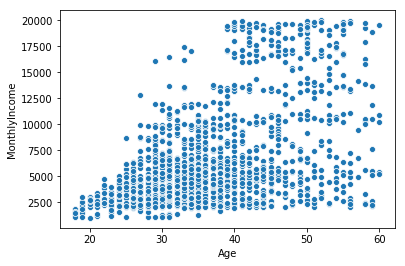

In [115]:
sns.scatterplot(data=hr,x='Age',y='MonthlyIncome')

In [116]:
#perfect positive correlation(x=ry)    r=1
#zero correlation(y=c)                r=0
#perfect negative correlation(y=rx+c)   r=-1
#r is the slope(and value of correlation)

In [119]:
hr[['MonthlyIncome','Age','TotalWorkingYears']].corr()

,MonthlyIncome,Age,TotalWorkingYears
MonthlyIncome,1.000000,0.497855,0.772893
Age,0.497855,1.000000,0.680381
TotalWorkingYears,0.772893,0.680381,1.000000


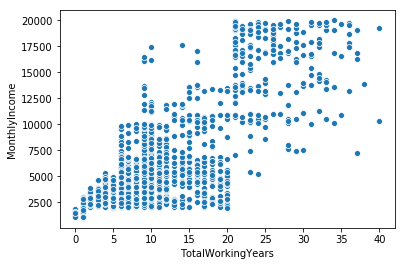

In [120]:
sns.scatterplot(data=hr,x='TotalWorkingYears',y='MonthlyIncome')

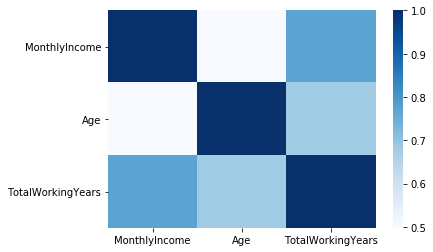

In [122]:
corr_matrix = hr[['MonthlyIncome','Age','TotalWorkingYears']].corr()
sns.heatmap(corr_matrix,cmap='Blues')

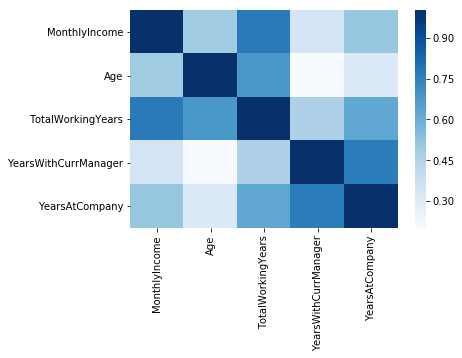

In [125]:
corr_matrix = hr[['MonthlyIncome','Age','TotalWorkingYears','YearsWithCurrManager','YearsAtCompany']].corr()
sns.heatmap(corr_matrix,cmap='Blues')

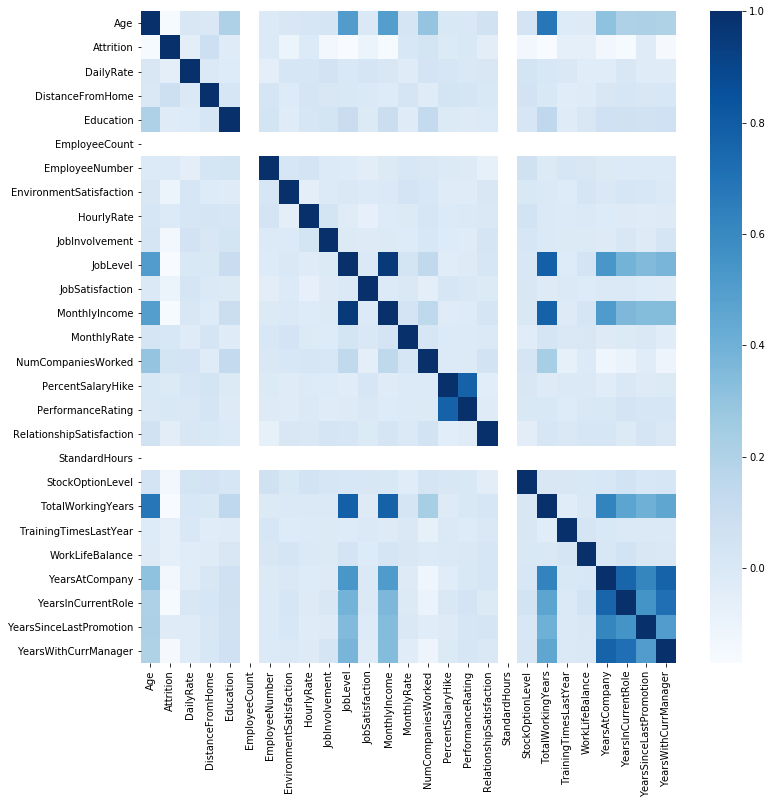

In [133]:
plt.figure(figsize=(12,12))
sns.heatmap(hr.corr(),cmap='Blues')

In [134]:
hr[['Age','MonthlyIncome']].head(5).values

array([[  41, 5993],
       [  49, 5130],
       [  37, 2090],
       [  33, 2909],
       [  27, 3468]], dtype=int64)

In [140]:
hr.describe() ##use this and remove the diagonal from the heatmap

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [142]:
num_cols = hr.describe().columns
hr_numeric = hr[num_cols].values
hr_numeric     ##use this and remove the diagonal from the heatmap

array([[  41,    1, 1102, ...,    4,    0,    5],
       [  49,    0,  279, ...,    7,    1,    7],
       [  37,    1, 1373, ...,    0,    0,    0],
       ...,
       [  27,    0,  155, ...,    2,    0,    3],
       [  49,    0, 1023, ...,    6,    0,    8],
       [  34,    0,  628, ...,    3,    1,    2]], dtype=int64)

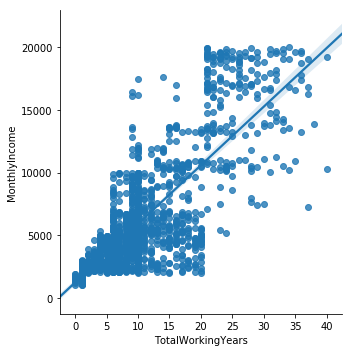

In [144]:
##Regression plot ot LM plot
sns.lmplot(data=hr,x='TotalWorkingYears',y='MonthlyIncome')  #line increasing(positive correlation)

In [145]:
insurance = pd.read_csv('https://bit.ly/2OCZffo')

In [146]:
insurance.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


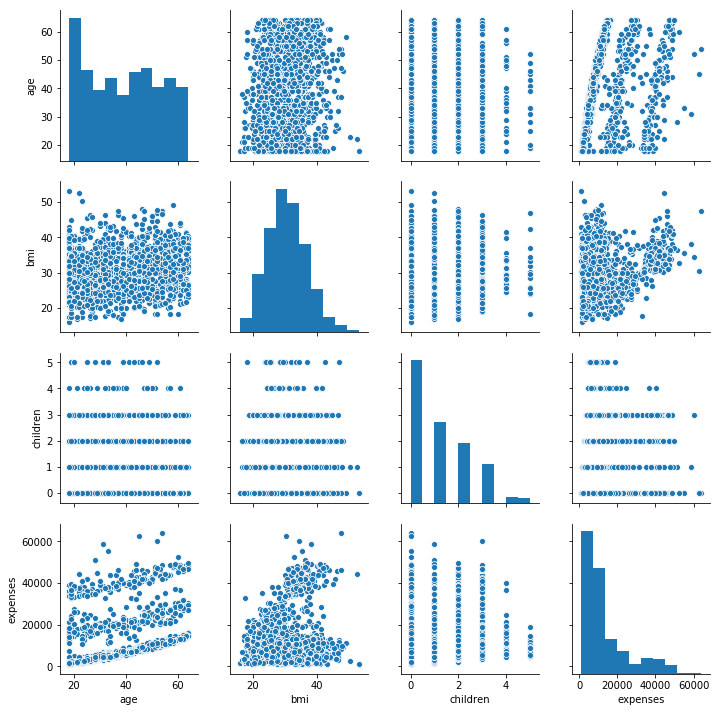

In [147]:
sns.pairplot(insurance)

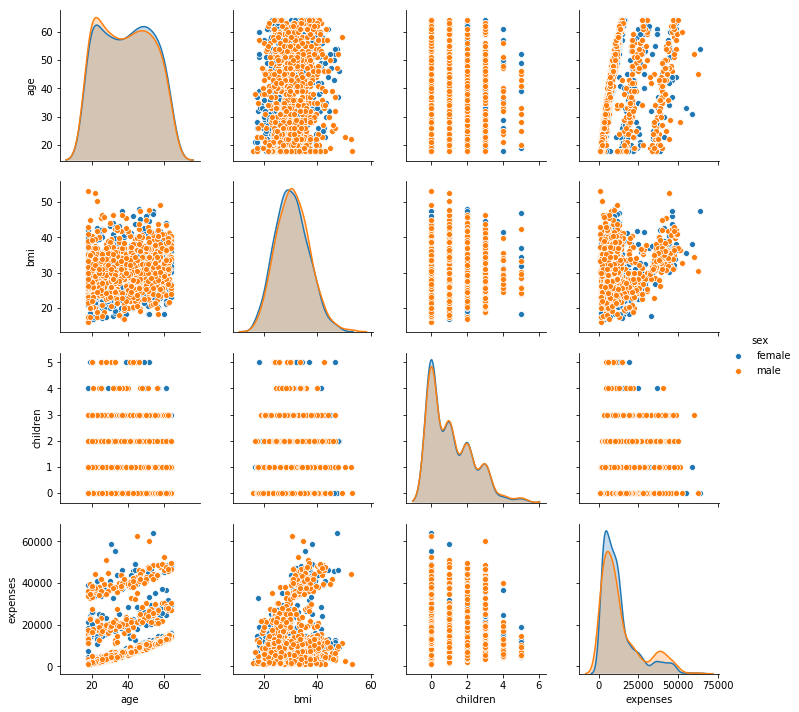

In [148]:
sns.pairplot(insurance,hue='sex')  #based on sex, colors become different

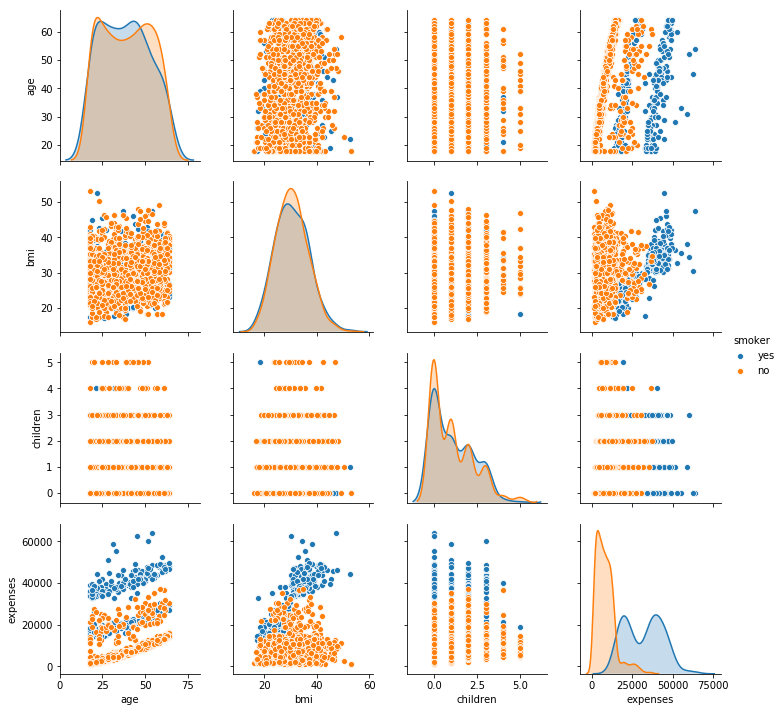

In [149]:
sns.pairplot(insurance,hue='smoker') #orange is non smoker

In [151]:
##Swarm plot & Point plot (kind of scatter plot)

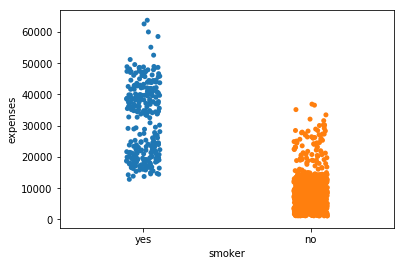

In [156]:
sns.stripplot(data=insurance,x='smoker',y='expenses')

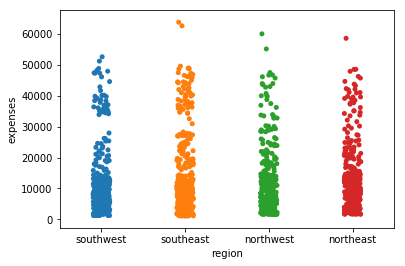

In [159]:
sns.stripplot(data=insurance,x='region',y='expenses')

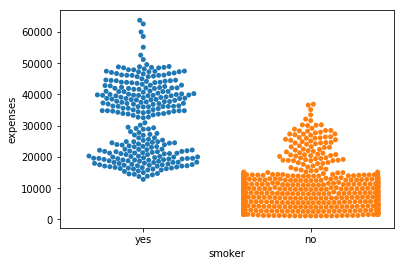

In [161]:
sns.swarmplot(data=insurance,x='smoker',y='expenses')   #jitter plot with non overlapping data points

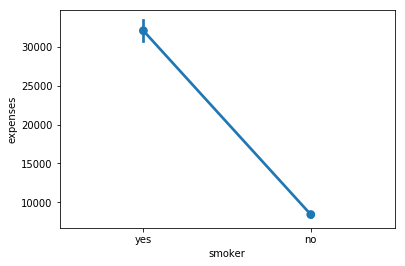

In [162]:
#factor plot or point plot
sns.pointplot(data=insurance,x='smoker',y='expenses')  #mean tendency based plot with a spread shown from the central tendency

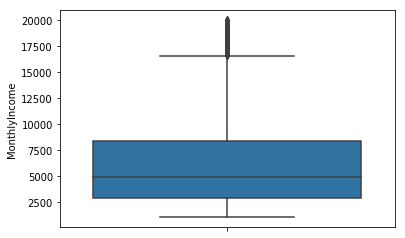

In [164]:
sns.boxplot(data=hr,y='MonthlyIncome', orient='v')

In [165]:
#prefer line/bar chart over pie chart(since it is difficult to differentiate between similar values in pie chart)

# Numpy Rank:

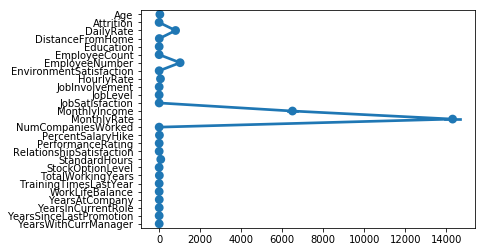

In [169]:
sns.pointplot(data=hr, orient='h')

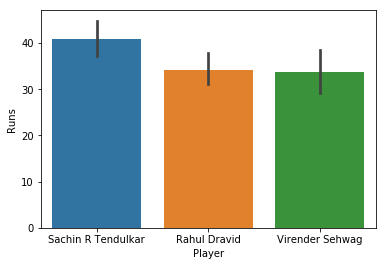

In [172]:
sns.barplot(data=odi1,x='Player',y='Runs')